In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("vaccine dataset1 (3).csv")

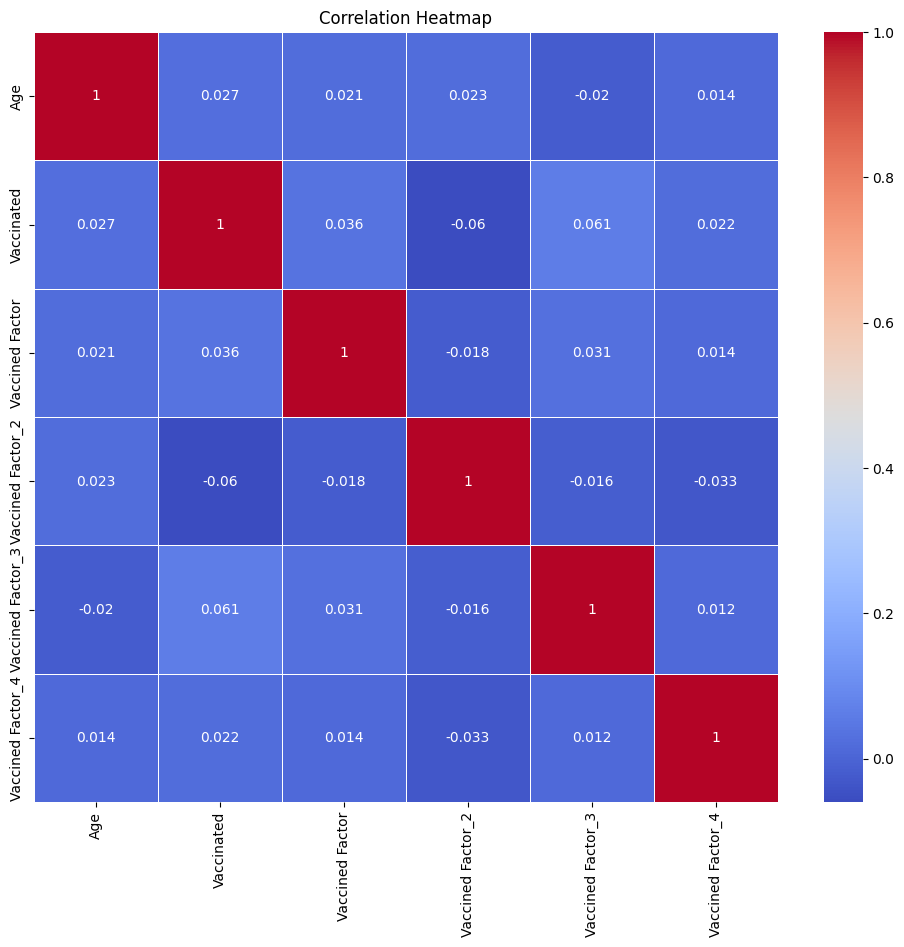

In [3]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


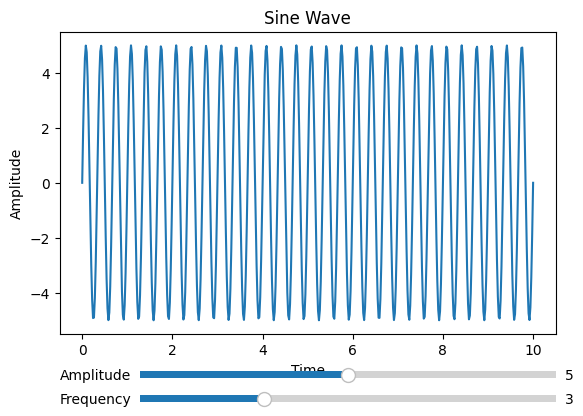

In [5]:
#To add a slider to a matplotlib plot in Python, you can use the Slider widget from the matplotlib.widgets module. Here's an example:



import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np

# Initial parameters
init_amplitude = 5
init_frequency = 3

# Generate initial data
t = np.linspace(0, 10, 500)
x = init_amplitude * np.sin(2 * np.pi * init_frequency * t)

# Create figure and axis
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)  # Make room for sliders

# Initial plot
line, = plt.plot(t, x)
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Sine Wave')

# Slider axes
ax_amplitude = plt.axes([0.25, 0.15, 0.65, 0.03])
ax_frequency = plt.axes([0.25, 0.1, 0.65, 0.03])

# Sliders
slider_amplitude = Slider(ax_amplitude, 'Amplitude', 0, 10, valinit=init_amplitude)
slider_frequency = Slider(ax_frequency, 'Frequency', 0, 10, valinit=init_frequency)

# Update function
def update(val):
    amplitude = slider_amplitude.val
    frequency = slider_frequency.val
    x = amplitude * np.sin(2 * np.pi * frequency * t)
    line.set_ydata(x)
    fig.canvas.draw_idle()

# Register update function with sliders
slider_amplitude.on_changed(update)
slider_frequency.on_changed(update)

# Show plot
plt.show()

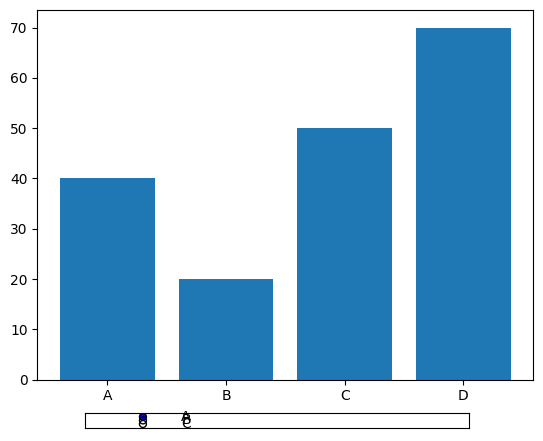

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'Category': ['A', 'B', 'C', 'A', 'C','D'],
        'Value': [10, 20, 30, 40, 50,70]}
df = pd.DataFrame(data)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.bar(df['Category'], df['Value'])

# Add a slicer (interactive filter)
def update_plot(category):
    filtered_df = df[df['Category'] == category]
    ax.clear()
    ax.bar(filtered_df['Category'], filtered_df['Value'])
    plt.draw_idle()

# Create a slicer widget
import matplotlib.widgets as widgets
ax_slicer = plt.axes([0.2, 0.01, 0.6, 0.03])
slicer = widgets.RadioButtons(ax_slicer, ['A', 'B', 'C'])

# Connect the slicer to the update function
slicer.on_clicked(update_plot)

# Show the plot
plt.show()

In [14]:
import plotly.graph_objects as go
import pandas as pd

# Sample data
data = {'Category': ['A', 'B', 'C', 'A', 'B', 'C'],
        'Value': [10, 20, 30, 40, 50, 60]}
df = pd.DataFrame(data)

# Create a figure
fig = go.Figure(data=[go.Bar(x=df['Category'], y=df['Value'])])

# Add a slicer (dropdown menu)
buttons = [
    dict(label='A', method='update', args=[{'x': df[df['Category'] == 'A']['Category'], 'y': df[df['Category'] == 'A']['Value']}]),
    dict(label='B', method='update', args=[{'x': df[df['Category'] == 'B']['Category'], 'y': df[df['Category'] == 'B']['Value']}]),
    dict(label='C', method='update', args=[{'x': df[df['Category'] == 'C']['Category'], 'y': df[df['Category'] == 'C']['Value']}])
]

# Create a dropdown menu
fig.update_layout(updatemenus=[dict(buttons=buttons, direction='down', x=0.7, y=1.1)])

# Show the plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [16]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import pandas as pd

# Sample data
data = {'Category': ['A', 'B', 'C', 'A', 'B', 'C'],
        'Value': [10, 20, 30, 40, 50, 60]}
df = pd.DataFrame(data)

# Create a Dash app
app = dash.Dash(__name__)

# Create a figure
fig = go.Figure(data=[go.Bar(x=df['Category'], y=df['Value'])])

# Add a slicer (dropdown menu)
dcc.Dropdown(
    id='slicer',
    options=[{'label': i, 'value': i} for i in df['Category'].unique()],
    value=df['Category'].unique()[0]
)

# Create a callback function
@app.callback(
    dash.dependencies.Output('graph', 'figure'),
    [dash.dependencies.Input('slicer', 'value')]
)
def update_graph(selected_category):
    filtered_df = df[df['Category'] == selected_category]
    fig = go.Figure(data=[go.Bar(x=filtered_df['Category'], y=filtered_df['Value'])])
    return fig

# Create the app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='slicer',
        options=[{'label': i, 'value': i} for i in df['Category'].unique()],
        value=df['Category'].unique()[0]
    ),
    dcc.Graph(id='graph', figure=fig)
])

# Run the app
if __name__ == '__main__':
    app.run_server()

C:\Users\INTEL\AppData\Local\Temp\ipykernel_1296\590115958.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\INTEL\AppData\Local\Temp\ipykernel_1296\590115958.py:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

